In [1]:
# tree 분석 -> variables-importance 출력
# 상관분석을 해서 중요변수를 선택
# PCA : 주성분을 이용해서 변수를 선택

from sklearn.datasets import load_boston # data, target
#데이터 프레임에 입력하시오 그리고 head로 그 값을 확인하시오
# 변수간에 상관계수를 구하고 이를 시각화하시오 (heatmap을 이용)
# 상관계수가 0.5보다 큰 변수만 선택하시오
# 선형회귀를 이용해서 분석을 할 때 RFE를 이용해서 변수를 7개로 줄이시오
# - 변수 Ranking을 출력

In [2]:
X, y = load_boston(return_X_y=True)

In [3]:
load_boston().feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
import pandas as pd
df=pd.DataFrame(X,columns=load_boston().feature_names)

In [5]:
y = pd.Series(y,name="Target")
df=pd.concat([df,y],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:title={'center':'load_boston'}>

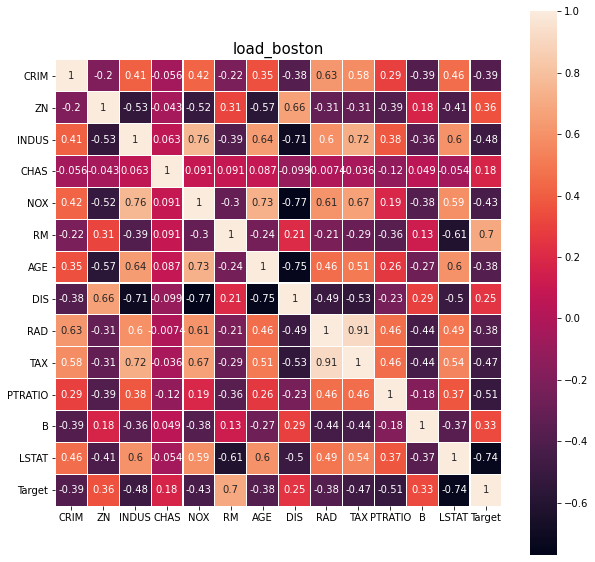

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title("load_boston", size = 15)
sns.heatmap(df.corr(), linewidths = 0.1, vmax = 1.0, square = True, linecolor = "white", annot = True, annot_kws = {"size" : 10})

In [11]:
a=df.corr().Target
a[abs(df.corr().Target)>0.5].keys()

Index(['RM', 'PTRATIO', 'LSTAT', 'Target'], dtype='object')

In [12]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector1 = RFE(estimator, 7, step=1)
selector1 = selector1.fit(X, y)
print(selector1.support_)
print(selector1.ranking_)
print(selector1.n_features_)

C:\Users\020\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[ True False False  True  True  True False  True False False  True False
  True]
[1 3 2 1 1 1 4 1 6 7 1 5 1]
7


In [13]:
TT=selector1.support_
col=df.columns
result=pd.DataFrame(TT,col[:13])
r=result[0]
r[result[0]==True].keys()

Index(['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')